In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1=pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3=df2.dropna()
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\High-Tech\AppData\Local\Temp\ipykernel_16948\2989175054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [10]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [17]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [18]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [20]:
len(df5.location.unique())

1304

In [21]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [22]:
len(location_stats[location_stats<=10])


1052

In [23]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10


Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [24]:
len(df5.location.unique())

1293

In [25]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())


242

In [26]:
df5.head(10)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [30]:
df5[df5.total_sqft/df5.bhk<300].head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [31]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [32]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
for key,subdf in df6.groupby('location'):
    print(subdf.shape[0])
    print(subdf)
    print(key)

10
                  location       size  total_sqft  bath  price  bhk  \
210    1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4   
848    1st Block Jayanagar      3 BHK      1630.0   3.0  194.0    3   
2152   1st Block Jayanagar      3 BHK      1875.0   2.0  235.0    3   
2355   1st Block Jayanagar  4 Bedroom      2400.0   4.0  450.0    4   
4991   1st Block Jayanagar      2 BHK      1000.0   3.0   60.0    2   
7138   1st Block Jayanagar      3 BHK      1200.0   2.0  130.0    3   
7358   1st Block Jayanagar      2 BHK      1235.0   2.0  148.0    2   
7383   1st Block Jayanagar      4 BHK      2750.0   4.0  413.0    4   
8507   1st Block Jayanagar      3 BHK      1760.0   3.0  115.0    3   
10972  1st Block Jayanagar      4 BHK      2450.0   4.0  368.0    4   

       price_per_sqft  
210      15017.543860  
848      11901.840491  
2152     12533.333333  
2355     18750.000000  
4991      6000.000000  
7138     10833.333333  
7358     11983.805668  
7383     15018.181818  

16
                  location       size  total_sqft  bath  price  bhk  \
152    Devarachikkanahalli      3 BHK      1250.0   2.0   44.0    3   
341    Devarachikkanahalli      2 BHK      1250.0   2.0   40.0    2   
2474   Devarachikkanahalli  2 Bedroom      1200.0   2.0   83.0    2   
5030   Devarachikkanahalli      2 BHK      1170.0   2.0   40.0    2   
5139   Devarachikkanahalli      1 BHK       615.0   1.0   24.0    1   
5209   Devarachikkanahalli      2 BHK      1230.0   2.0   58.0    2   
5536   Devarachikkanahalli  3 Bedroom      1200.0   3.0  160.0    3   
5771   Devarachikkanahalli      3 BHK      1425.0   2.0   65.0    3   
6591   Devarachikkanahalli      2 BHK       947.0   2.0   43.0    2   
7536   Devarachikkanahalli      2 BHK      1130.0   2.0   36.0    2   
7767   Devarachikkanahalli      3 BHK      1417.0   2.0   76.0    3   
8268   Devarachikkanahalli      2 BHK      1230.0   2.0   58.0    2   
8954   Devarachikkanahalli      3 BHK      1705.0   3.0   75.0    3   
989

                location   size  total_sqft  bath  price  bhk  price_per_sqft
338    Somasundara Palya  3 BHK      1600.0   3.0   64.0    3     4000.000000
998    Somasundara Palya  2 BHK      1255.0   2.0   67.0    2     5338.645418
2482   Somasundara Palya  2 BHK      1448.0   2.0   68.0    2     4696.132597
2961   Somasundara Palya  3 BHK      1570.0   3.0   68.0    3     4331.210191
3127   Somasundara Palya  2 BHK      1178.0   2.0   73.0    2     6196.943973
3141   Somasundara Palya  2 BHK      1260.0   2.0   60.0    2     4761.904762
3475   Somasundara Palya  2 BHK      1174.0   2.0   74.0    2     6303.236797
3712   Somasundara Palya  2 BHK      1033.0   2.0   48.0    2     4646.660213
3768   Somasundara Palya  3 BHK      1575.0   3.0   63.1    3     4006.349206
3990   Somasundara Palya  2 BHK      1329.0   2.0   70.0    2     5267.118134
4111   Somasundara Palya  3 BHK      2372.0   3.0  140.0    3     5902.192243
4164   Somasundara Palya  2 BHK      1178.0   2.0   78.0    2   

In [41]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

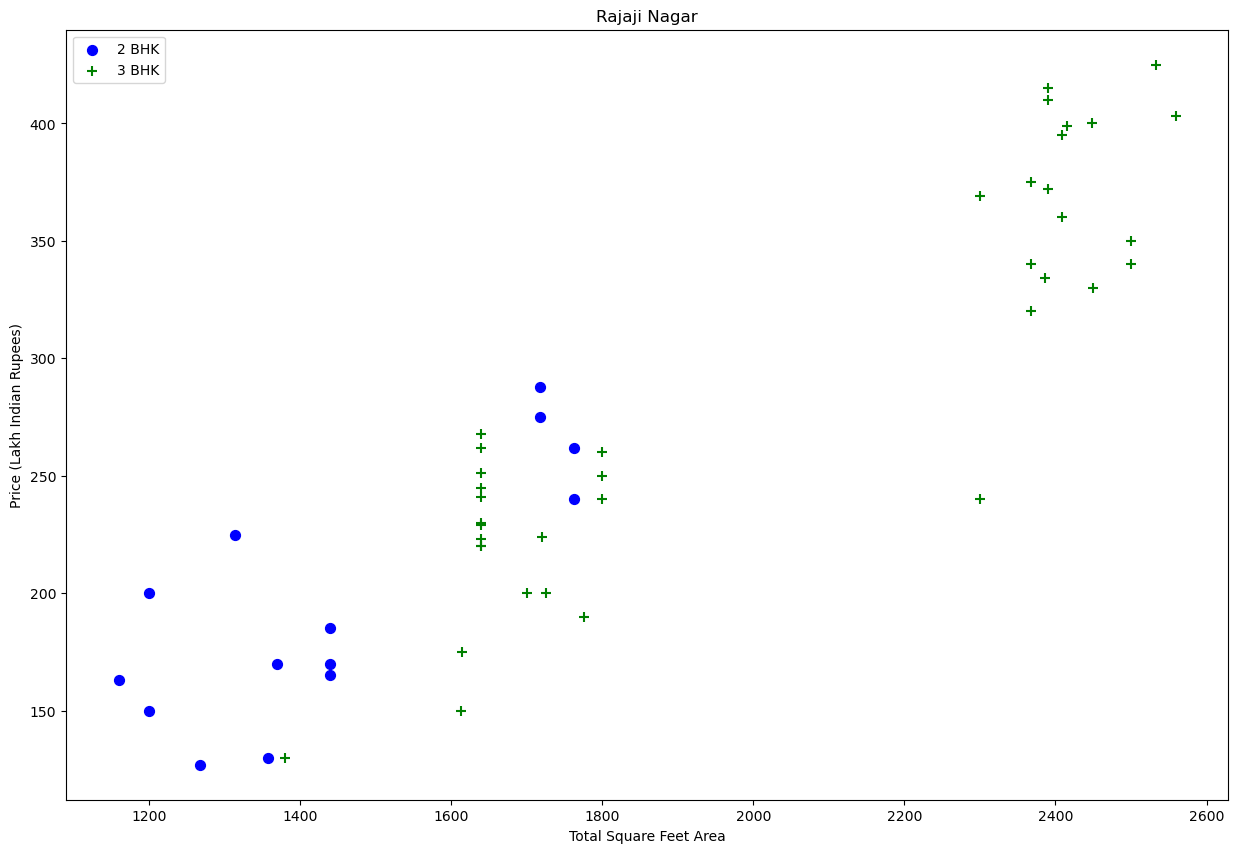

In [53]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [54]:
def remove_bhk_outlier(df):
    exclude_indecies=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_states={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_states[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std' :np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_states.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indecies=np.append(exclude_indecies,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indecies,axis='index')                
  
df8=remove_bhk_outlier(df7)
df8.shape
            

(7329, 7)

In [55]:
    for location,location_df in df7.groupby('location'):
#         print(location_df)
        for bhk,bhk_df in location_df.groupby('bhk'):
            print(bhk_df)



              location   size  total_sqft  bath  price  bhk  price_per_sqft
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668
              location   size  total_sqft  bath  price  bhk  price_per_sqft
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3    10833.333333
              location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
5  1st Block Jayanagar  4 BHK      2750.0   4.0  413.0    4    15018.181818
6  1st Block Jayanagar  4 BHK      2450.0   4.0  368.0    4    15020.408163
              location   size  total_sqft  bath  price  bhk  price_per_sqft
16  1st Phase JP Nagar  1 BHK       840.0   2.0   50.0    1     5952.380952
              location       size  total_sqft  bath  price  bhk  \
13  1st Phase JP Naga

                  location   size  total_sqft  bath  price  bhk  \
744  Banashankari Stage II  2 BHK      1700.0   2.0  150.0    2   
749  Banashankari Stage II  2 BHK      1250.0   2.0  110.0    2   
752  Banashankari Stage II  2 BHK      1400.0   2.0  100.0    2   
756  Banashankari Stage II  2 BHK      1245.0   2.0  125.0    2   

     price_per_sqft  
744     8823.529412  
749     8800.000000  
752     7142.857143  
756    10040.160643  
                  location       size  total_sqft  bath   price  bhk  \
746  Banashankari Stage II      3 BHK      1500.0   2.0  120.00    3   
748  Banashankari Stage II      3 BHK      1240.0   2.0   59.52    3   
750  Banashankari Stage II      3 BHK      1260.0   2.0   95.00    3   
751  Banashankari Stage II  3 Bedroom      2400.0   2.0  300.00    3   
754  Banashankari Stage II  3 Bedroom      3000.0   3.0  450.00    3   
755  Banashankari Stage II      3 BHK      1200.0   2.0  198.00    3   

     price_per_sqft  
746      8000.00000  
748  

                         location   size  total_sqft  bath  price  bhk  \
1343  Bommasandra Industrial Area  3 BHK      1320.0   2.0  38.12    3   
1344  Bommasandra Industrial Area  3 BHK      1400.0   2.0  40.44    3   
1345  Bommasandra Industrial Area  3 BHK      1320.0   2.0  38.13    3   
1346  Bommasandra Industrial Area  3 BHK      1220.0   2.0  35.23    3   
1350  Bommasandra Industrial Area  3 BHK      1310.0   2.0  37.83    3   
1355  Bommasandra Industrial Area  3 BHK      1220.0   2.0  35.20    3   
1356  Bommasandra Industrial Area  3 BHK      1491.0   3.0  40.50    3   

      price_per_sqft  
1343     2887.878788  
1344     2888.571429  
1345     2888.636364  
1346     2887.704918  
1350     2887.786260  
1355     2885.245902  
1356     2716.297787  
          location       size  total_sqft  bath  price  bhk  price_per_sqft
1360  Bommenahalli  3 Bedroom      1200.0   3.0  125.0    3    10416.666667
1365  Bommenahalli  3 Bedroom      3339.0   3.0  250.0    3     7487.27

                    location   size  total_sqft  bath  price  bhk  \
2410  Gollarapalya Hosahalli  2 BHK       861.0   2.0   34.5    2   
2412  Gollarapalya Hosahalli  2 BHK       861.0   2.0   34.5    2   
2414  Gollarapalya Hosahalli  2 BHK       861.0   2.0   36.5    2   
2419  Gollarapalya Hosahalli  2 BHK      1129.0   2.0   50.0    2   

      price_per_sqft  
2410     4006.968641  
2412     4006.968641  
2414     4239.256678  
2419     4428.697963  
                    location   size  total_sqft  bath  price  bhk  \
2411  Gollarapalya Hosahalli  3 BHK      1408.0   3.0   62.0    3   
2413  Gollarapalya Hosahalli  3 BHK      1318.0   3.0   54.0    3   
2415  Gollarapalya Hosahalli  3 BHK      1320.0   3.0   60.0    3   
2416  Gollarapalya Hosahalli  3 BHK      1345.0   3.0   60.0    3   
2418  Gollarapalya Hosahalli  3 BHK      1318.0   3.0   56.0    3   

      price_per_sqft  
2411     4403.409091  
2413     4097.116844  
2415     4545.454545  
2416     4460.966543  
2418     

       location   size  total_sqft  bath  price  bhk  price_per_sqft
3327  Hosa Road  1 BHK       615.0   1.0  28.29    1         4600.00
3342  Hosa Road  1 BHK       800.0   1.0  39.99    1         4998.75
       location       size  total_sqft  bath  price  bhk  price_per_sqft
3320  Hosa Road      2 BHK      1161.0   2.0  55.15    2     4750.215332
3322  Hosa Road      2 BHK      1161.0   2.0  55.15    2     4750.215332
3323  Hosa Road      2 BHK      1365.0   2.0  92.00    2     6739.926740
3324  Hosa Road      2 BHK      1243.0   2.0  48.50    2     3901.850362
3329  Hosa Road      2 BHK      1133.0   2.0  52.00    2     4589.585172
3330  Hosa Road      2 BHK      1016.0   2.0  40.00    2     3937.007874
3331  Hosa Road      2 BHK       972.0   2.0  40.00    2     4115.226337
3332  Hosa Road      2 BHK      1161.0   2.0  55.15    2     4750.215332
3335  Hosa Road  2 Bedroom       880.0   2.0  50.00    2     5681.818182
3337  Hosa Road      2 BHK      1040.0   2.0  68.59    2     65

               location   size  total_sqft  bath  price  bhk  price_per_sqft
4472  Kodichikkanahalli  1 BHK       450.0   1.0   18.0    1          4000.0
               location   size  total_sqft  bath  price  bhk  price_per_sqft
4462  Kodichikkanahalli  2 BHK       995.0   2.0   41.0    2     4120.603015
4465  Kodichikkanahalli  2 BHK      1125.0   2.0   52.0    2     4622.222222
4466  Kodichikkanahalli  2 BHK      1150.0   2.0   48.0    2     4173.913043
4467  Kodichikkanahalli  2 BHK      1070.0   2.0   43.0    2     4018.691589
4470  Kodichikkanahalli  2 BHK      1026.0   2.0   45.0    2     4385.964912
4473  Kodichikkanahalli  2 BHK       907.0   2.0   38.5    2     4244.762955
4474  Kodichikkanahalli  2 BHK      1181.0   2.0   57.0    2     4826.418290
4475  Kodichikkanahalli  2 BHK       900.0   2.0   42.0    2     4666.666667
4478  Kodichikkanahalli  2 BHK       976.0   2.0   50.0    2     5122.950820
4480  Kodichikkanahalli  2 BHK      1299.0   2.0   58.0    2     4464.973056

          location   size  total_sqft  bath  price  bhk  price_per_sqft
5000  Marathahalli  1 BHK       607.0   1.0   35.0    1     5766.062603
5006  Marathahalli  1 BHK       615.0   1.0   44.0    1     7154.471545
5011  Marathahalli  1 BHK       780.0   1.0   55.0    1     7051.282051
5033  Marathahalli  1 BHK       700.0   1.0   38.0    1     5428.571429
5074  Marathahalli  1 BHK      1100.0   2.0   75.0    1     6818.181818
          location   size  total_sqft  bath  price  bhk  price_per_sqft
4945  Marathahalli  2 BHK      1220.0   2.0  57.00    2     4672.131148
4946  Marathahalli  2 BHK      1200.0   2.0  52.00    2     4333.333333
4947  Marathahalli  2 BHK      1200.0   2.0  60.00    2     5000.000000
4949  Marathahalli  2 BHK       950.0   2.0  46.96    2     4943.157895
4950  Marathahalli  2 BHK      1230.0   2.0  80.00    2     6504.065041
...            ...    ...         ...   ...    ...  ...             ...
5084  Marathahalli  2 BHK      1026.0   2.0  50.18    2     4890

            location   size  total_sqft  bath  price  bhk  price_per_sqft
6723  Thigalarapalya  2 BHK      1297.0   2.0  103.0    2     7941.403238
6724  Thigalarapalya  2 BHK      1418.0   2.0   95.0    2     6699.576869
6728  Thigalarapalya  2 BHK      1418.0   2.0  103.0    2     7263.751763
6729  Thigalarapalya  2 BHK      1418.0   2.0  101.0    2     7122.708039
6730  Thigalarapalya  2 BHK      1418.0   2.0  104.0    2     7334.273625
6734  Thigalarapalya  2 BHK      1418.0   2.0  103.0    2     7263.751763
6737  Thigalarapalya  2 BHK      1418.0   2.0  106.0    2     7475.317348
6739  Thigalarapalya  2 BHK      1418.0   2.0  104.0    2     7334.273625
6741  Thigalarapalya  2 BHK      1418.0   2.0  105.0    2     7404.795487
6742  Thigalarapalya  2 BHK      1418.0   2.0  104.0    2     7334.273625
6745  Thigalarapalya  2 BHK      1418.0   2.0  106.0    2     7475.317348
6748  Thigalarapalya  2 BHK      1418.0   2.0  105.0    2     7404.795487
6759  Thigalarapalya  2 BHK      1418.

      location       size  total_sqft  bath  price  bhk  price_per_sqft
7943     other      1 BHK       600.0   1.0   38.0    1     6333.333333
8040     other  1 Bedroom       700.0   1.0   41.0    1     5857.142857
8044     other      1 BHK      1200.0   2.0   85.0    1     7083.333333
8055     other  1 Bedroom       540.0   1.0   36.0    1     6666.666667
8059     other      1 BHK       416.0   1.0   18.5    1     4447.115385
...        ...        ...         ...   ...    ...  ...             ...
10176    other      1 BHK       450.0   1.0   20.0    1     4444.444444
10181    other      1 BHK       540.0   1.0   22.5    1     4166.666667
10219    other      1 BHK       530.0   1.0   18.0    1     3396.226415
10233    other      1 BHK      1800.0   1.0  200.0    1    11111.111111
10237    other  1 Bedroom       812.0   1.0   26.0    1     3201.970443

[132 rows x 7 columns]
      location   size  total_sqft  bath  price  bhk  price_per_sqft
7941     other  2 BHK      1100.0   2.0   48

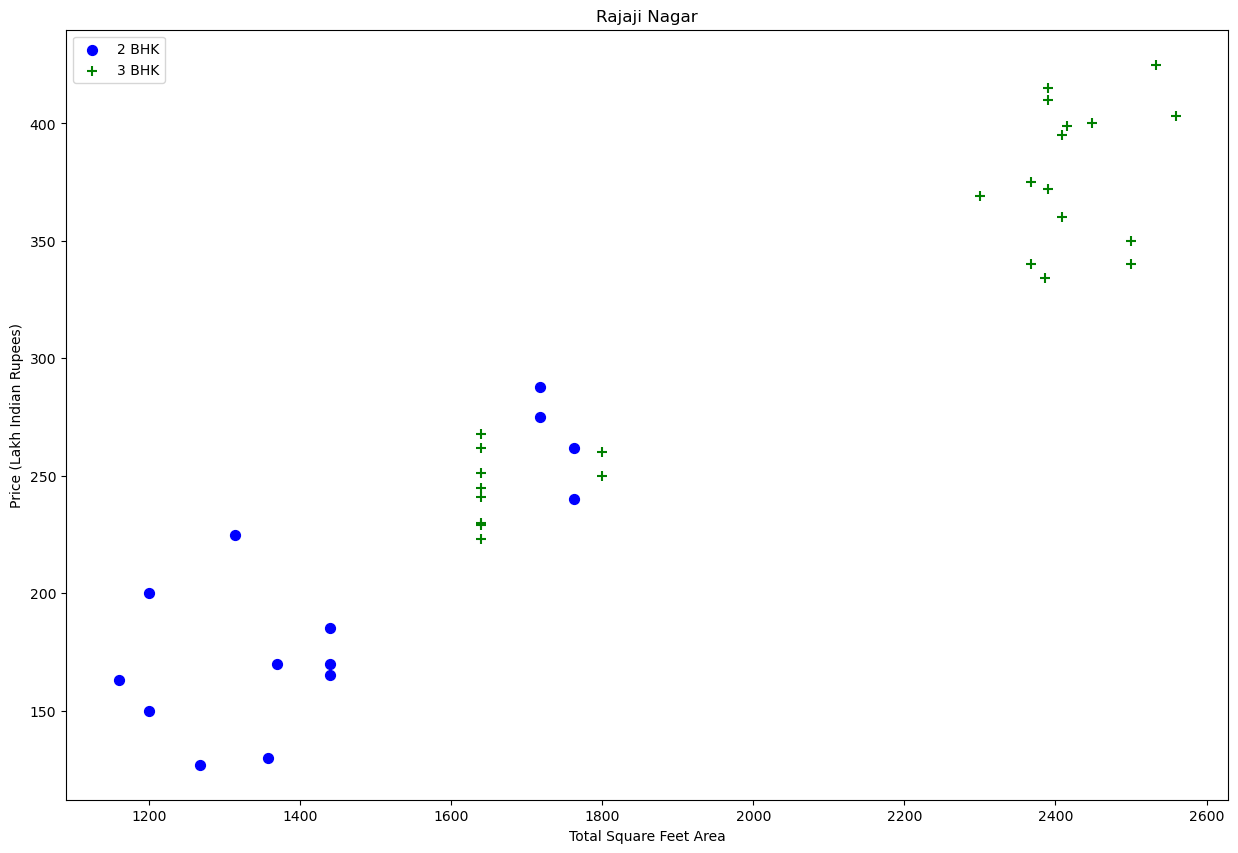

In [56]:
plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

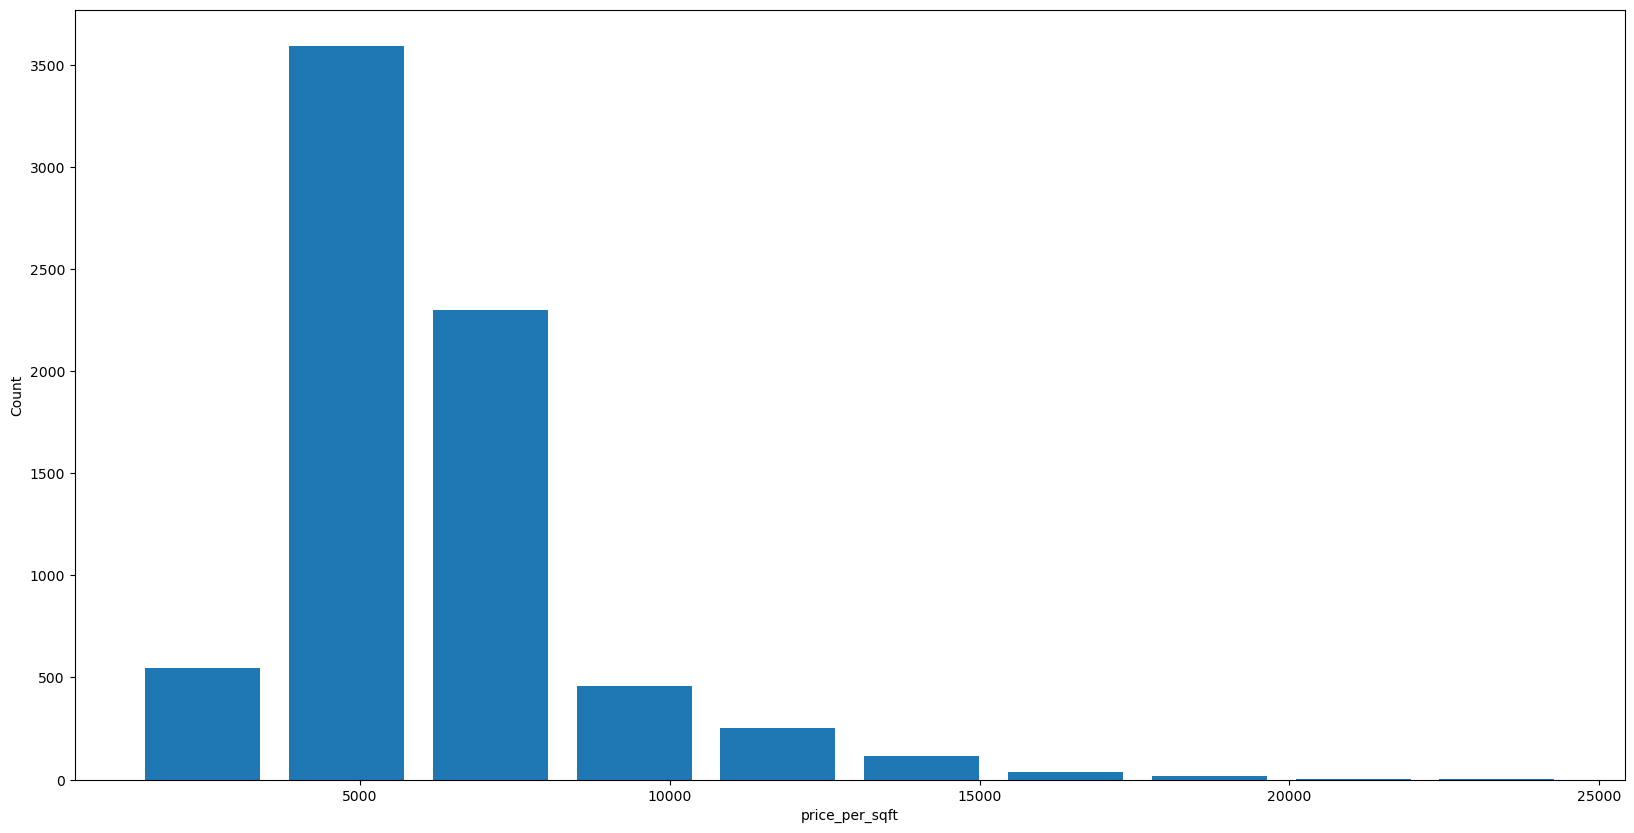

In [57]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')


In [58]:
df8.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [59]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [60]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

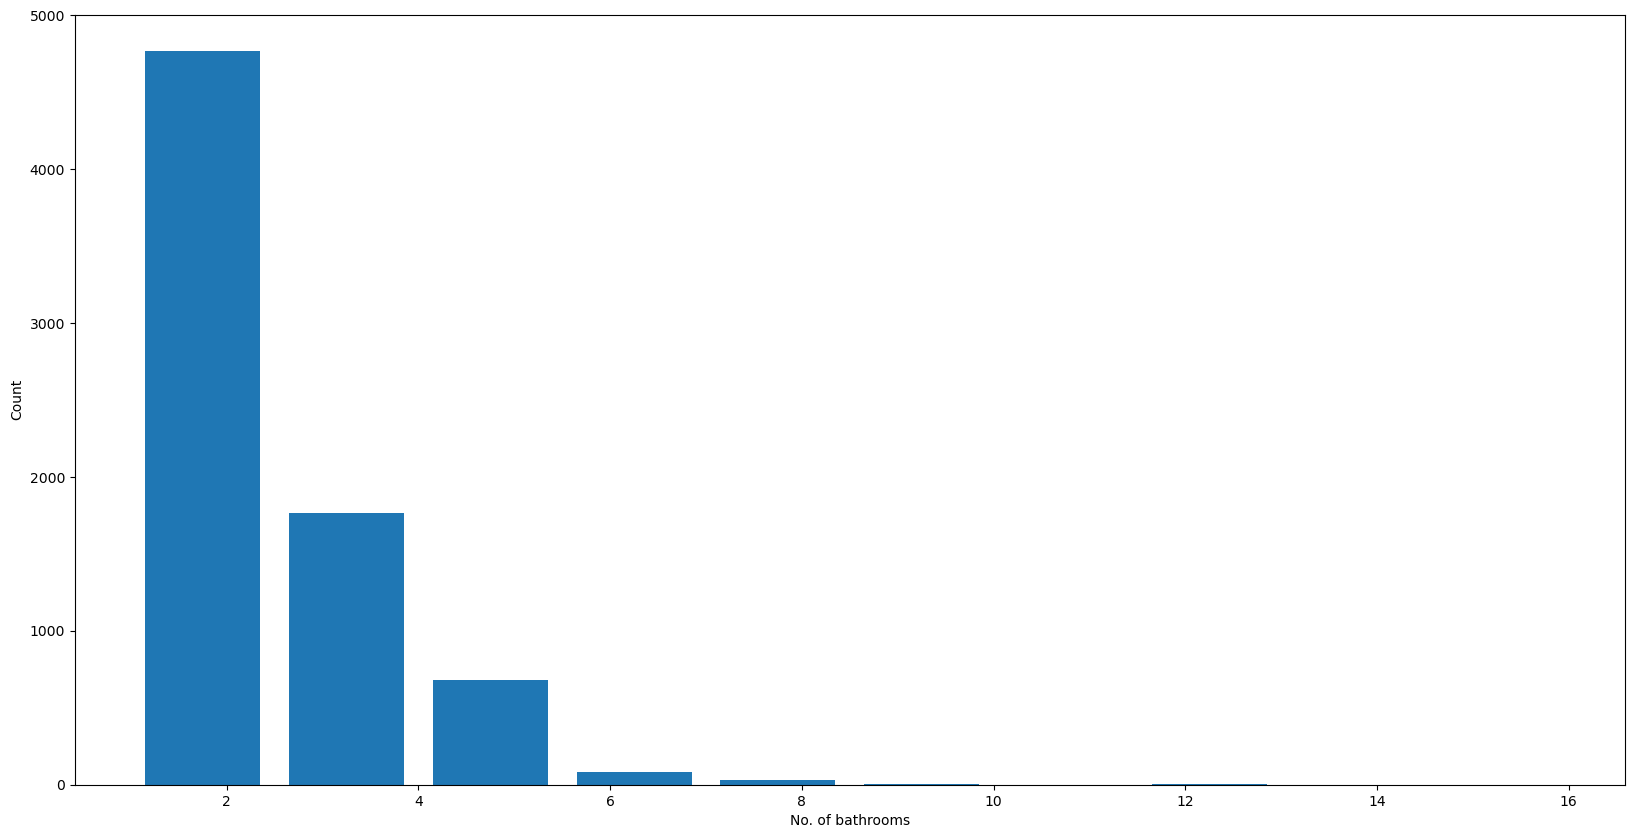

In [61]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel('No. of bathrooms')
plt.ylabel('Count')

In [62]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [63]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [67]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(5)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [68]:
dummies=pd.get_dummies(df10.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [72]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df12.shape

(7251, 245)

In [77]:
X=df12.drop('price',axis='columns')
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
y=df12.price
y.head(2)

0    428.0
1    194.0
Name: price, dtype: float64

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [80]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.845227769787429

In [87]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [88]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [89]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    
    return lr_clf.predict([x])[0]

In [90]:
predict_price('1st Phase JP Nagar',1000, 2, 2)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677172415

In [91]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [92]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json",'w') as f:
    f.write(json.dumps(columns))
    